In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
IMG_SIZE = (96, 96)
classes = ['Average', 'Beautiful']

In [29]:
import cv2

XML_PATH = cv2.data.haarcascades
facesCascade = cv2.CascadeClassifier(XML_PATH + '/haarcascade_frontalface_default.xml')

def detect_faces(image):
  coors = facesCascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=6, minSize=(60, 60), flags=cv2.CASCADE_SCALE_IMAGE)
  faces = []
  for (x, y, w, h) in coors:
    face = image[y:y+w, x:x+h]
    face = cv2.resize(face, IMG_SIZE)
    faces.append(face)

  return coors, np.array(faces)

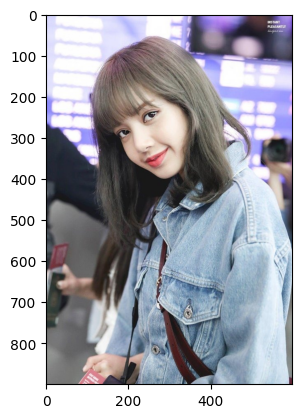

In [28]:
image = cv2.imread('test beauty img/lisa.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
coors, faces = detect_faces(image)

for (x, y, w, h) in coors:
  cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0), thickness=4)

plt.imshow(image)
plt.show()

### Load model

In [4]:
model = tf.keras.models.load_model('beauty_1.h5')

### Predict with images

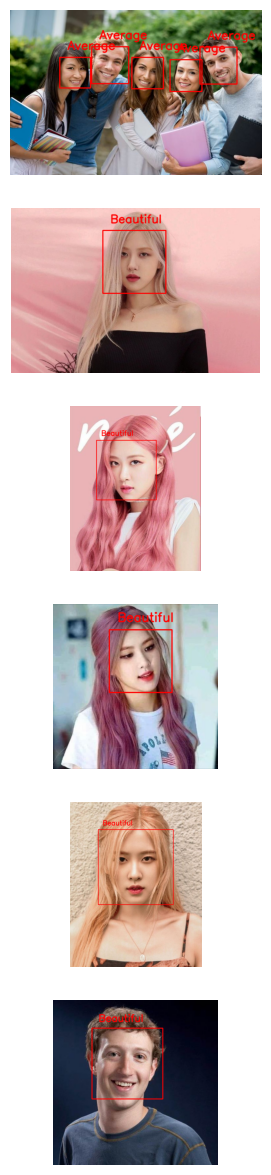

In [10]:
import os

TEST_PATH = './test beauty img'

plt.figure(figsize=(15,15))

n = len(os.listdir(TEST_PATH))
count = 1
for file in os.listdir(TEST_PATH):
  image = cv2.imread(os.path.join(TEST_PATH, file))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  coors, faces = detect_faces(image)
  
  if (len(faces) == 0):
    print('No faces detected in ' + file)
    continue
  
  predictions = model.predict(faces)
  
  predictions = tf.where(predictions >= 0.5, 1, 0).numpy().astype(np.int).flatten()

  for idx, (x, y, w, h) in enumerate(coors):
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(image, classes[predictions[idx]], (x + 20, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

  plt.subplot(n,1,count)
  plt.imshow(image)
  plt.axis('off')
  count += 1

plt.show()